# Analiza podatkov s pandas
V Jupyter notebooku bomo analizirali kriptovalute, ki smo jih zbrali v datoteki ***kriptovalute.csv***

## Naložimo pandas in podatke

In [36]:
# Uvoz potrebnih knjižnic
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# omejimo prikaz na 20 vrstic
pd.options.display.max_rows = 20

# Omogočimo interaktivno risanje grafov znotraj zvezka
%matplotlib inline

# Naložimo podatke
KRIPTO = pd.read_csv("kriptovalute.csv", index_col="rang")

# Prikaz prvih nekaj vrstic
KRIPTO.head()

,ime,oznaka,cena,sprememba_1h,sprememba_24h,sprememba_7d,trzna_vrednost,obseg_24h,ponudba_v_obtoku
rang,,,,,,,,,
1,Bitcoin,BTC,116748.552916,-0.024121,0.353642,3.046608,2.323768e+12,5.530233e+10,1.990404e+07
2,Ethereum,ETH,4216.204141,-0.237632,5.810505,21.289002,5.089342e+11,4.504883e+10,1.207091e+08
3,XRP,XRP,3.285681,0.128560,0.721034,14.839367,1.948684e+11,5.853649e+09,5.930839e+10
4,Tether USDt,USDT,1.000261,0.011069,0.024533,0.045982,1.645304e+11,1.082377e+11,1.644874e+11
5,BNB,BNB,806.064906,-0.147578,2.127157,7.619192,1.122752e+11,2.260074e+09,1.392880e+08


## Olepšava tabele

Ker so nekateri podatki v zgornji tabeli zapisani z zelo velikimi številkami ali v eksponentni obliki, jih je **težje** hitro razumeti in vizualno niso najbolj prijetni.

Zato bomo s pomočjo pomožne funkcije podatke oblikovali tako, da bodo:

- prikazani z največ dvema decimalnima mestoma,
- velika števila nadomeščena s krajšavama **M** (milijon) in **B** (milijarda).

In [37]:
KRIPTO_lepse = KRIPTO.copy()

# Pomožna funkcija za formatiranje števil 
def formatiraj(vrednost):
    if vrednost >= 1e9:
        return f'{vrednost/1e9:.2f} B'
    elif vrednost >= 1e6:
        return f'{vrednost/1e6:.2f} M'
    else:
        return round(vrednost, 2)

# Uporabimo funkcijo na vsakem številskem stolpcu
stolpci = [
    'cena', 'sprememba_1h', 'sprememba_24h', 'sprememba_7d',
    'trzna_vrednost', 'obseg_24h', 'ponudba_v_obtoku'
]

for stolpec in stolpci:
    KRIPTO_lepse[stolpec] = KRIPTO_lepse[stolpec].apply(formatiraj)

KRIPTO_lepse.head()


,ime,oznaka,cena,sprememba_1h,sprememba_24h,sprememba_7d,trzna_vrednost,obseg_24h,ponudba_v_obtoku
rang,,,,,,,,,
1,Bitcoin,BTC,116748.55,-0.02,0.35,3.05,2323.77 B,55.30 B,19.90 M
2,Ethereum,ETH,4216.20,-0.24,5.81,21.29,508.93 B,45.05 B,120.71 M
3,XRP,XRP,3.29,0.13,0.72,14.84,194.87 B,5.85 B,59.31 B
4,Tether USDt,USDT,1.00,0.01,0.02,0.05,164.53 B,108.24 B,164.49 B
5,BNB,BNB,806.06,-0.15,2.13,7.62,112.28 B,2.26 B,139.29 M


## Top 10 najdražjih valut
Seznam desetih najdražjih kriptovalut, kar ne pomeni nujno 10 največjih.

In [38]:
KRIPTO_lepse.sort_values(by='cena', ascending=False).head(10)

,ime,oznaka,cena,sprememba_1h,sprememba_24h,sprememba_7d,trzna_vrednost,obseg_24h,ponudba_v_obtoku
rang,,,,,,,,,
1,Bitcoin,BTC,116748.55,-0.02,0.35,3.05,2323.77 B,55.30 B,19.90 M
242,yearn.finance,YFI,5755.65,0.26,2.81,14.01,194.54 M,22.96 M,33800.26
2,Ethereum,ETH,4216.20,-0.24,5.81,21.29,508.93 B,45.05 B,120.71 M
311,Ultima,ULTIMA,3615.57,-0.27,-0.21,-20.30,135.25 M,15.99 M,37409.0
625,Matrixdock Gold,XAUM,3418.02,0.03,0.04,1.12,45.14 M,536794.65,13207.5
93,Tether Gold,XAUt,3388.68,-0.07,-0.06,0.93,835.39 M,29.39 M,246524.0
85,PAX Gold,PAXG,3388.66,-0.06,-0.03,0.80,963.00 M,72.98 M,284182.59
5,BNB,BNB,806.06,-0.15,2.13,7.62,112.28 B,2.26 B,139.29 M
15,Bitcoin Cash,BCH,570.74,0.08,-2.12,6.88,11.36 B,402.81 M,19.91 M


Graf primerjave cen desetih najdražjih valut. Bitcoin ima daleč najvišjo ceno, medtem ko so ostali pogosto bistveno cenejši.

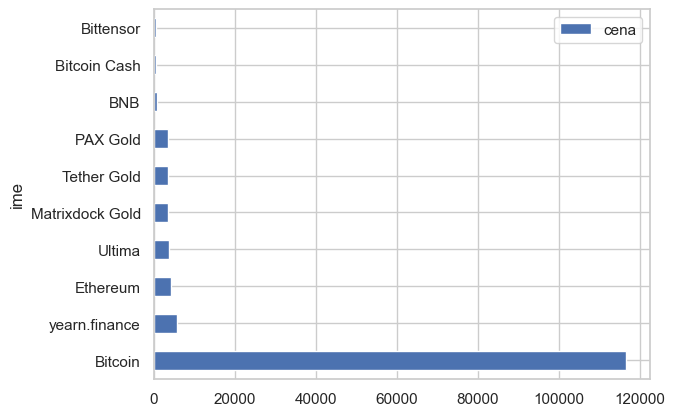

In [51]:
KRIPTO_lepse[['ime', 'cena']].sort_values(by='cena', ascending=False).head(10).plot(
    kind='barh',
    x='ime',
    y='cena')
plt.show()

## Največja rast v 24h

In [40]:
KRIPTO_lepse.sort_values(by='sprememba_24h', ascending=False).head(10)

,ime,oznaka,cena,sprememba_1h,sprememba_24h,sprememba_7d,trzna_vrednost,obseg_24h,ponudba_v_obtoku
rang,,,,,,,,,
392,SOON,SOON,0.41,1.45,92.78,161.83,97.64 M,201.35 M,239.21 M
703,Bulla,BULLA,0.13,35.47,72.32,139.63,36.49 M,16.72 M,280.00 M
554,Keyboard Cat,KEYCAT,0.01,-3.36,60.13,77.26,56.88 M,12.21 M,10.00 B
483,Hashflow,HFT,0.12,8.78,53.81,72.17,69.31 M,125.31 M,597.04 M
817,INFINIT,IN,0.11,-5.81,51.42,14.98,25.95 M,54.15 M,228.33 M
784,Alpine F1 Team Fan Token,ALPINE,1.54,-0.03,48.96,81.59,28.79 M,114.21 M,18.72 M
454,Radix,XRD,0.01,-6.13,47.51,66.42,78.68 M,1.92 M,11.81 B
629,Heima,HEI,0.58,-2.16,42.91,49.25,44.57 M,133.54 M,76.52 M
999,Jager Hunter,JAGER,0.00,-11.24,36.25,161.83,15.05 M,3.51 M,13794134.46 B


Dajmo tudi to vizualizirat z vrstičnim prikazom, kjer je bolje videti spremembe med kriptovalutami.

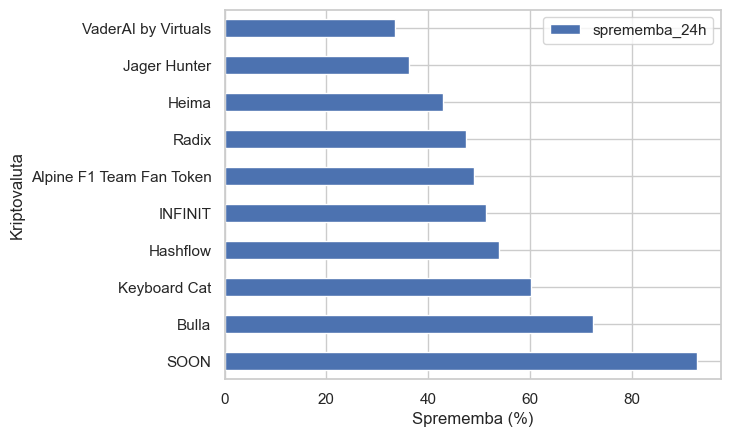

In [41]:
top_rast = KRIPTO_lepse.sort_values(by='sprememba_24h', ascending=False).head(10)
top_rast.plot(
    kind='barh',
    x='ime',
    y='sprememba_24h'
)
plt.xlabel("Sprememba (%)")
plt.ylabel("Kriptovaluta")
plt.show()

## Filtracija
Izbrali bomo kriptovalute z **nizko ceno**, ki so **v zadnjem dnevu zrasle**, imajo **visok obseg trgovanja** in **zmerno tržno vrednost** – s ciljem **iskanja** valut z večjim potencialom za **investiranje**.

In [42]:
filter = KRIPTO_lepse[
    (KRIPTO['cena'] < 0.5) & 
    (KRIPTO['sprememba_24h'] > 15) &
    (KRIPTO['obseg_24h'] > 50_000_000) &
    (KRIPTO['trzna_vrednost'] < 2_000_000_000)
]

filter.sort_values(by='sprememba_24h', ascending=False).head(10)

,ime,oznaka,cena,sprememba_1h,sprememba_24h,sprememba_7d,trzna_vrednost,obseg_24h,ponudba_v_obtoku
rang,,,,,,,,,
392,SOON,SOON,0.41,1.45,92.78,161.83,97.64 M,201.35 M,239.21 M
483,Hashflow,HFT,0.12,8.78,53.81,72.17,69.31 M,125.31 M,597.04 M
817,INFINIT,IN,0.11,-5.81,51.42,14.98,25.95 M,54.15 M,228.33 M
696,Bubblemaps,BMT,0.10,1.02,25.95,29.07,37.74 M,105.03 M,395.09 M
552,Velodrome Finance,VELO,0.06,0.99,24.90,35.27,57.43 M,73.76 M,915.20 M
193,CoW Protocol,COW,0.46,0.15,23.86,35.40,231.50 M,205.21 M,500.33 M
556,MyShell,SHELL,0.19,1.52,18.54,34.50,56.32 M,53.91 M,294.17 M


## Histogram kategorij tržne vrednosti
S pomočjo pomožne funkcije bomo dodali nov stolpec v tabeli - kategorijo tržne vrednosti in to prikazali v histogramu, da vidimo razporeditev.

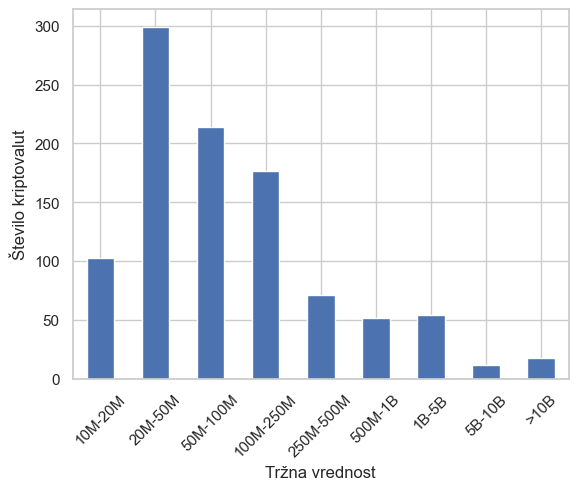

In [43]:
def doloci_kategorijo(x):
    if x < 20_000_000 and x >= 10_000_000:
        return '10M-20M'
    elif x < 50_000_000:
        return '20M-50M'
    elif x < 100_000_000:
        return '50M-100M'
    elif x < 250_000_000:
        return '100M-250M'
    elif x < 500_000_000:
        return '250M-500M'
    elif x < 1_000_000_000:
        return '500M-1B'
    elif x < 5_000_000_000:
        return '1B-5B'
    elif x < 10_000_000_000:
        return '5B-10B'
    else:
        return '>10B'

KRIPTO['kategorija'] = KRIPTO['trzna_vrednost'].apply(doloci_kategorijo)

kategorije = [
    '10M-20M',
    '20M-50M',
    '50M-100M',
    '100M-250M',
    '250M-500M',
    '500M-1B',
    '1B-5B',
    '5B-10B',
    '>10B'
]

KRIPTO['kategorija'].value_counts().reindex(kategorije).plot(kind='bar')
plt.xlabel('Tržna vrednost')
plt.ylabel('Število kriptovalut')
plt.xticks(rotation=45)
plt.show()

## Delež kriptovalut nad/pod 1$
Podobno kot pri histogramu kategorij tržnih vrednosti si bomo ogledali kako je z valutami ki stanejo pod/nad 1$ - tokrat v pie chartu.

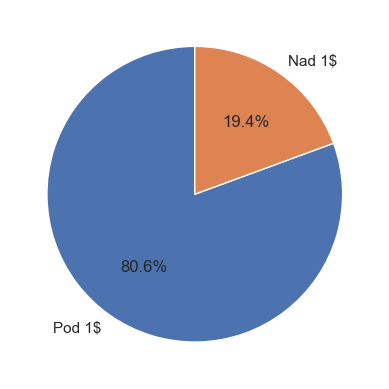

In [44]:
def nad_ali_pod(x):
    if x > 1:
        return 'Nad 1$'
    else:
        return 'Pod 1$'
        
KRIPTO_lepse['cenovni_razred'] = KRIPTO_lepse['cena'].apply(nad_ali_pod)
KRIPTO_lepse['cenovni_razred'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.ylabel('')
plt.show()


## Heatmap - spremembe cen top 20 kriptovalut po tržni vrednosti
Z heatmapo bomo videli nihanje vseh treh sprememb (1h, 24h, 7d) top 20 kriptovalut po tržni vrednosti.

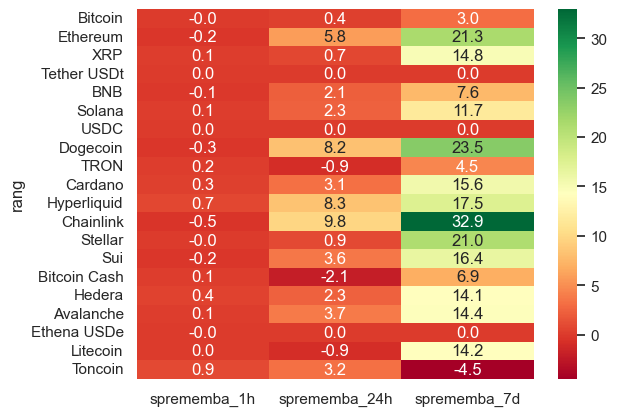

In [45]:
top20 = KRIPTO.sort_values(by='trzna_vrednost', ascending=False).head(20)

sns.heatmap(
    top20[['sprememba_1h', 'sprememba_24h', 'sprememba_7d']],
    annot=True,
    fmt=".1f",
    cmap='RdYlGn',
    yticklabels=top20['ime']
)

plt.show()

## Škatla z brki
Škatla z brki nam omogoča analizo nihanja in odstopanj v spremembah. Vidimo daje sprememba v zadnji uri kar stabilna, okoli 0%, sprememba v zadnjem tednu pa ima pozitiven trend, z večjim nihanjem in tudi več odstopanj.

<Figure size 1200x600 with 0 Axes>

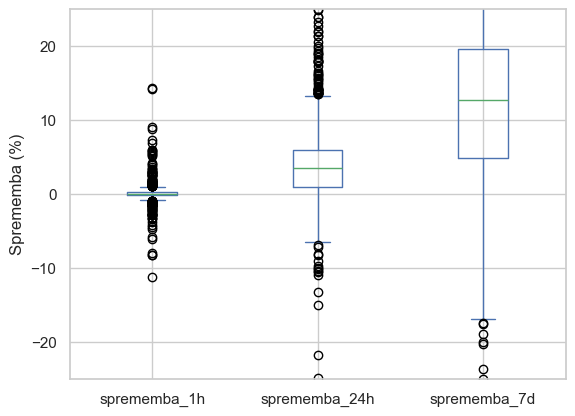

In [54]:
plt.figure(figsize=(12, 6))
KRIPTO_lepse[['sprememba_1h', 'sprememba_24h', 'sprememba_7d']].plot(kind='box')

plt.xlabel("")
plt.ylabel("Sprememba (%)")
plt.ylim(-25, 25)
plt.show()

## Razmerje med obsegom trgovanja in tržno vrednostjo
V stolpičnem prikazu bomo izrisali top 10 kriptovalut po razmerju med obsegom trgovanja v zadnjem dnevu in tržno vrednostjo. Razmerje nam pove, kako velik delež tržne vrednosti se je obrnil v zadnjem dnevu. Torej visoko razmerje pomeni zelo aktivno trgovanje s kriptovaluto (v zadnjem dnevu).

In [47]:
KRIPTO_lepse['razmerje'] = KRIPTO['obseg_24h'] / KRIPTO['trzna_vrednost']
KRIPTO_lepse.sort_values(by='razmerje', ascending=False).head(10)

,ime,oznaka,cena,sprememba_1h,sprememba_24h,sprememba_7d,trzna_vrednost,obseg_24h,ponudba_v_obtoku,cenovni_razred,razmerje
rang,,,,,,,,,,,
275,48 Club Token,KOGE,48.02,0.01,0.01,0.06,162.70 M,2.20 B,3.39 M,Nad 1$,13.523525
715,Aspecta,ASP,0.15,0.87,2.16,8.29,35.40 M,381.56 M,230.00 M,Pod 1$,10.779819
717,MemeFi,MEMEFI,0.00,5.62,5.99,153.65,34.99 M,294.24 M,10.00 B,Pod 1$,8.409619
936,Fireverse,FIR,0.12,-0.14,0.50,75.16,18.17 M,83.58 M,152.60 M,Pod 1$,4.599898
25,Dai,DAI,1.00,0.00,-0.00,0.02,5.37 B,22.46 B,5.37 B,Pod 1$,4.185561
66,First Digital USD,FDUSD,1.00,-0.01,0.03,0.05,1.45 B,5.94 B,1.45 B,Pod 1$,4.098538
784,Alpine F1 Team Fan Token,ALPINE,1.54,-0.03,48.96,81.59,28.79 M,114.21 M,18.72 M,Nad 1$,3.966412
419,Treasure,MAGIC,0.28,-0.60,9.71,52.14,88.84 M,350.85 M,314.41 M,Pod 1$,3.949294
937,FIO Protocol,FIO,0.02,-0.22,8.75,31.29,18.17 M,64.79 M,815.81 M,Pod 1$,3.565912


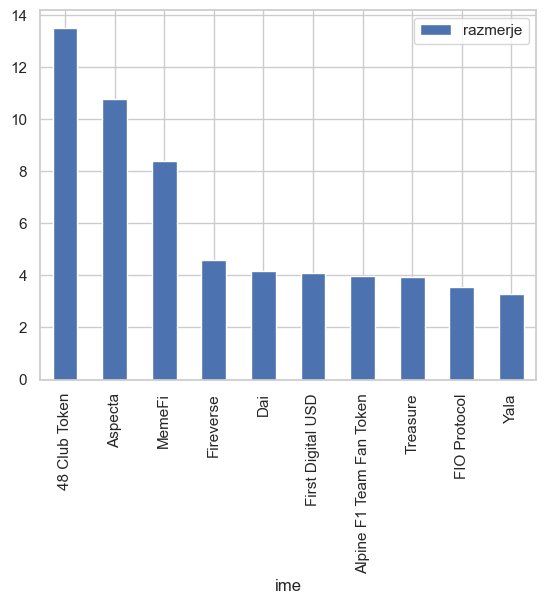

In [55]:
KRIPTO_lepse.sort_values(by='razmerje', ascending=False).head(10).plot(
    kind='bar',
    x='ime',
    y='razmerje')

plt.show()


Nadaljujemo z analizo razmerja med obsegom trgovanja in tržno vrednostjo - tokrat naredimo scatterplot, ki nam pokaže:
- dominanco velikanov (BTC, ETH so v desnem zgornjem kotu, torej stabilni)
- priložnosti za investiranje (desno spodaj so kriptovalute z nizko ceno, visokim obsegom, npr. SOON - kot prej ugotovljeno)
- tvegane kriptovalute (spodaj levo so valute z nizkim obsegom trgovanja in majhno tržno vrednostjo)

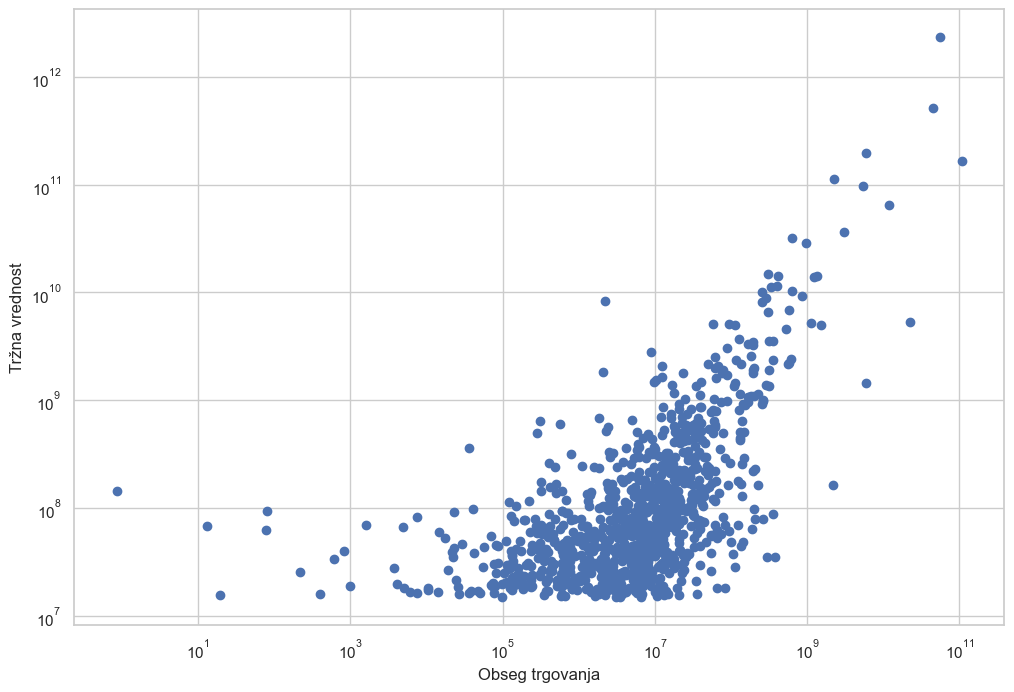

In [49]:
plt.figure(figsize=(12, 8))
plt.scatter(KRIPTO['obseg_24h'], KRIPTO['trzna_vrednost'], )

# Logaritmične skale za boljšo berljivost
plt.xscale('log')
plt.yscale('log')

plt.xlabel('Obseg trgovanja')
plt.ylabel('Tržna vrednost')
plt.show()